# World Mortality Rate Visulisation

## Step 1: Load the data

There are 4 .csv data files:
1. Adult mortality.csv
2. Maternal mortality.csv
3. Number of deaths (thousands).csv
4. Probability of dying per 1000 live births.csv

In [2]:
# The datasets are downloaded from https://www.kaggle.com/datasets/navinmundhra/world-mortality

# Setting up Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
# Getting the data
adult_rate_per1000 = pd.read_csv('Adult mortality.csv',skiprows=[0]) 
adult_rate_per1000.head()
adult_rate_per1000.dtypes

Country       object
Year           int64
Both sexes     int64
Male           int64
Female         int64
dtype: object

In [4]:
maternal_mortality = pd.read_csv('Maternal mortality.csv')
maternal_mortality['Maternal mortality ratio (per 100 000 live births)'] = maternal_mortality['Maternal mortality ratio (per 100 000 live births)'].str.split('[').str[0].str.replace(" ","")
maternal_mortality['Number of maternal deaths'] = maternal_mortality['Number of maternal deaths'].str.split('[').str[0].str.replace(" ","")
maternal_mortality['Maternal mortality ratio (per 100 000 live births)'] = maternal_mortality['Maternal mortality ratio (per 100 000 live births)'].astype(str).astype(int)
# maternal_mortality['Number of maternal deaths'] = maternal_mortality['Number of maternal deaths'].astype(str).astype(int)


## Step 2: Global view on 2016

In [5]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names', 
                  color=col, hover_name="Country", 
                  title=col, hover_data=[col], color_continuous_scale=pal)
#     fig.update_layout(coloraxis_showscale=False)
    fig.show()

In [7]:
adult_rate_2016 = adult_rate_per1000.query("Year == 2016")

In [8]:
plot_map(adult_rate_2016, 'Both sexes', 'matter')

From the global map, we can find that Africa countries generally have higher adult mortality rates. 

## Step 3: View on Singapore

<AxesSubplot:xlabel='Year', ylabel='Both sexes'>

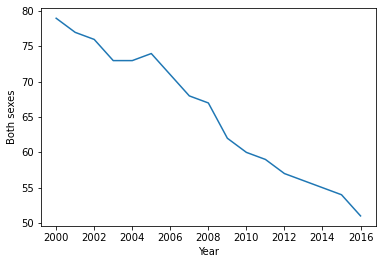

In [10]:
Singapore_adultrate = adult_rate_per1000.query("Country == 'Singapore'")
sns.lineplot(data=Singapore_adultrate, x="Year", y="Both sexes")

In [11]:
adultrate_wide = adult_rate_per1000.pivot("Year", "Country", "Both sexes")
adultrate_wide.head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2000,316,106,142,384,157,139,143,77,94,161,...,458,114,134,183,184,173,139,251,594,675
2001,307,100,139,372,154,138,143,74,90,149,...,458,116,127,177,180,175,138,251,594,688
2002,292,102,135,355,149,137,137,72,87,144,...,456,115,129,176,176,175,137,250,594,695
2003,286,107,133,343,151,134,137,69,86,151,...,453,114,125,173,172,180,137,249,593,697
2004,282,101,125,334,153,128,135,67,84,151,...,448,111,125,174,168,168,137,248,575,694


<AxesSubplot:xlabel='Year'>

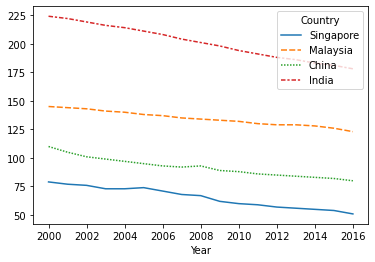

In [12]:
sns.lineplot(data=adultrate_wide.loc[:,['Singapore', 'Malaysia', 'China', 'India']])

From line charts, we can find that Singapore's adult mortality rate has a decreasing trend from 2000 and is the lowest among the 4 selected countries: Malaysia, China, India, and Singapore. 